##### Let's Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
#This Program uses dual moving average crossover to determine when to buy and sell stokcs
import os
os.chdir(r"C:\Users\thars\Downloads")

aaple = pd.read_csv(r"C:\Users\thars\Downloads\AAPL.csv")
print(aaple.head())

        Date  Open Price  High Price  Low Price  Close Price  Adj Close Price  \
0  5/27/2014   87.982857   89.408569  87.947144    89.375717        80.948952   
1  5/28/2014   89.431427   89.975716  89.111427    89.144287        80.739334   
2  5/29/2014   89.692856   90.981430  89.681427    90.768570        82.210480   
3  5/30/2014   91.139999   92.024284  89.842857    90.428574        81.902557   
4   6/2/2014   90.565712   90.690002  88.928574    89.807144        81.339699   

      Volume  
0   87216500  
1   78870400  
2   94118500  
3  141005200  
4   92337700  


#### let's visualize the data

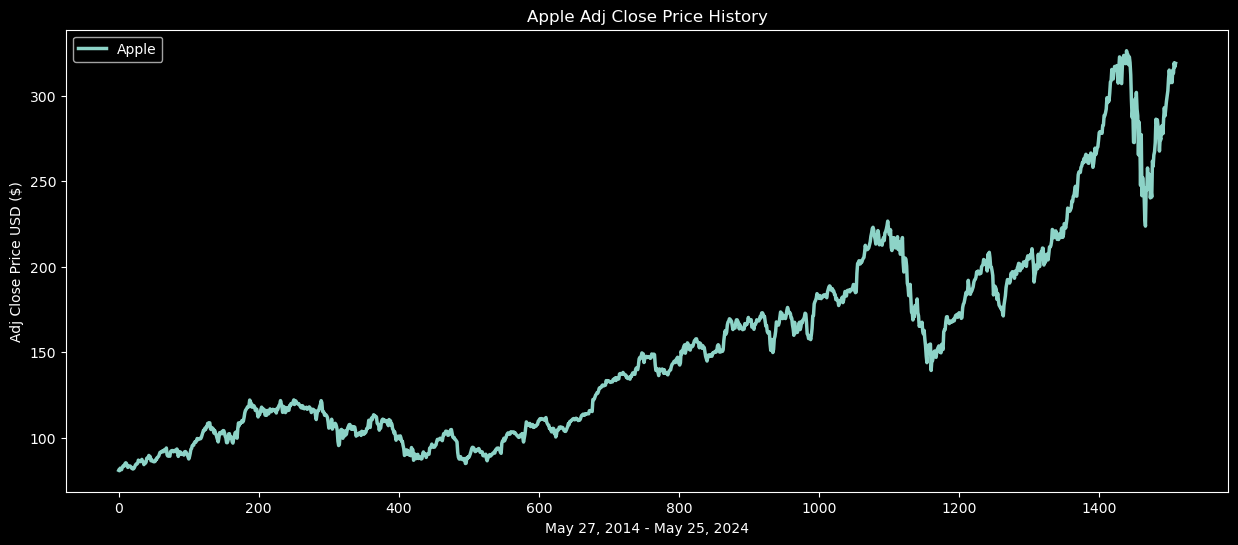

In [3]:
plt.figure(figsize=(15, 6))
plt.plot(aaple["Adj Close Price"], label="Apple", linewidth=2.5)
plt.title("Apple Adj Close Price History")
plt.xlabel("May 27, 2014 - May 25, 2024")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()

#### Create a Simple Moving Average with 30 day window

In [4]:
sma30 = pd.DataFrame()
sma30["Adj Close Price"] = aaple["Adj Close Price"].rolling(window=30).mean()
sma30["Adj Close Price"].head(50)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29    83.375965
30    83.557539
31    83.735534
32    83.869925
33    84.051715
34    84.218151
35    84.329942
36    84.359313
37    84.418227
38    84.470026
39    84.500821
40    84.589582
41    84.685285
42    84.847709
43    85.081384
44    85.267962
45    85.451217
46    85.554469
47    85.683382
48    85.824673
49    85.954191
Name: Adj Close Price, dtype: float64

#### Create a simple moving average of 100 day window

In [5]:
sma100 = pd.DataFrame()
sma100["Adj Close Price"] = aaple["Adj Close Price"].rolling(window=100).mean()
sma100["Adj Close Price"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1505    289.734840
1506    290.037927
1507    290.345799
1508    290.630966
1509    290.919420
Name: Adj Close Price, Length: 1510, dtype: float64

#### Now Let's Visualize the data

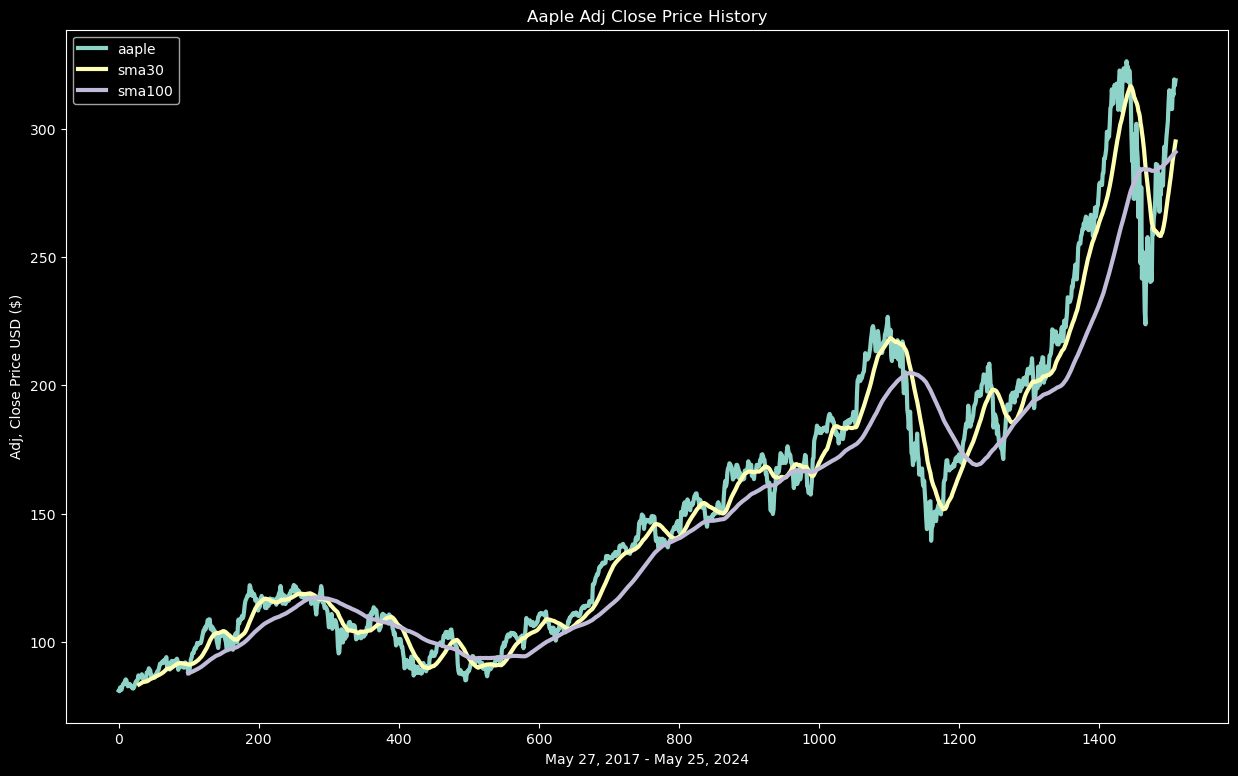

In [6]:
plt.figure(figsize=(15, 9))
plt.plot(aaple["Adj Close Price"], label="aaple", linewidth=3)
plt.plot(sma30["Adj Close Price"], label="sma30", linewidth=3)
plt.plot(sma100["Adj Close Price"], label="sma100", linewidth=3)
plt.title("Aaple Adj Close Price History")
plt.xlabel("May 27, 2017 - May 25, 2024")
plt.ylabel("Adj, Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()

#### Now Create a New Data Frame to store a Data

In [7]:
data = pd.DataFrame()
data['apple'] = aaple['Adj Close Price']
data['SMA30'] = sma30['Adj Close Price']
data['SMA100'] = sma100['Adj Close Price']

data

,apple,SMA30,SMA100
0,80.948952,NaN,NaN
1,80.739334,NaN,NaN
2,82.210480,NaN,NaN
3,81.902557,NaN,NaN
4,81.339699,NaN,NaN
...,...,...,...
1505,314.959991,287.864806,289.734840
1506,313.140015,289.577426,290.037927
1507,319.230011,291.594106,290.345799
1508,316.850006,293.310716,290.630966


#### Create a Function to Signal When to buy and sell Stock

In [8]:
def buySell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    if data ['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['apple'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['apple'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

#### To Store the Buy and Sell Data into a Variable

In [9]:
buySell = buySell(data)
data["Buye Signal Price"] = buySell[0]
data["Sell Signal Price"] = buySell[1]

#to show the data
data

,apple,SMA30,SMA100,Buye Signal Price,Sell Signal Price
0,80.948952,NaN,NaN,NaN,NaN
1,80.739334,NaN,NaN,NaN,NaN
2,82.210480,NaN,NaN,NaN,NaN
3,81.902557,NaN,NaN,NaN,NaN
4,81.339699,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1505,314.959991,287.864806,289.734840,NaN,NaN
1506,313.140015,289.577426,290.037927,NaN,NaN
1507,319.230011,291.594106,290.345799,319.230011,NaN
1508,316.850006,293.310716,290.630966,NaN,NaN


In [35]:
data.loc[data["Buye Signal Price"].notna() | data["Sell Signal Price"].notna()]

,apple,SMA30,SMA100,Buye Signal Price,Sell Signal Price
99,88.782898,91.173741,87.780364,88.782898,NaN
283,113.615921,117.126637,117.159816,NaN,113.615921
377,110.918350,107.945106,107.759133,110.918350,NaN
405,97.948441,105.128844,105.332809,NaN,97.948441
471,101.574081,98.045568,97.690301,101.574081,NaN
499,88.931747,93.970103,94.023232,NaN,88.931747
557,102.122032,94.640375,94.292204,102.122032,NaN
952,169.717896,164.065575,164.257118,NaN,169.717896
956,174.507965,165.248247,165.130783,174.507965,NaN
986,158.683258,166.159273,166.340270,NaN,158.683258


#### Now Visualize data and strategy to buy and sell stock

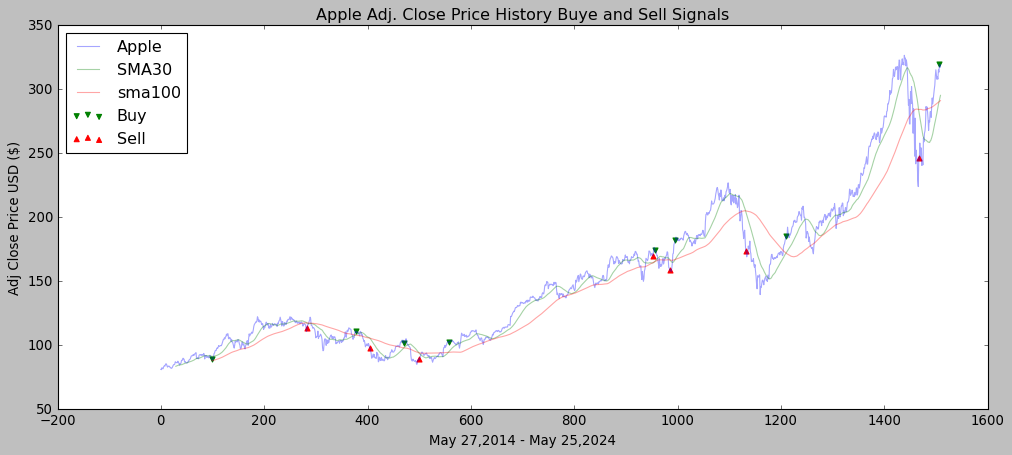

In [29]:
plt.style.use("classic")
plt.figure(figsize=(15, 6))
plt.plot(data["apple"], label="Apple", alpha=0.35)
plt.plot(data["SMA30"], label="SMA30", alpha=0.35)
plt.plot(data["SMA100"], label="sma100", alpha=0.35)
plt.scatter(data.index, data["Buye Signal Price"], label = "Buy", marker="v", color="Green")
plt.scatter(data.index, data["Sell Signal Price"], label = "Sell", marker="^", color="red")
plt.title("Apple Adj. Close Price History Buye and Sell Signals")
plt.xlabel("May 27,2014 - May 25,2024")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()